# COMP 6934 - Assignment 2
- Professor:       Terrence Tricco
- Term:            Winter 2024
- Student Name:    **Daniel Wiredu**
- Student User:    **dbwiredu**
- Student Email:   dbwiredu@mun.ca
- Student ID:      **202286594**

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create dataframe / import data
df_sleep = pd.read_csv('sleep.csv')

In [3]:
df_sleep

,Age group,Min age,Max age,Not recommended lower,Approriate lower,Recommended lower,Recommended upper,Appropriate upper,Not recommended upper
0,Newborns,0.00,0.33,11,13,14,17,18,19
1,Infants,0.33,1.00,10,11,12,15,16,18
2,Toddlers,1.00,3.00,9,10,11,14,15,16
3,Preschoolers,3.00,6.00,8,9,10,13,14,15
4,School-aged children,6.00,12.00,7,8,9,12,12,12
5,Teenagers,12.00,18.00,7,7,8,10,11,11
6,Young adults,18.00,25.00,6,6,7,9,11,11
7,Adults,25.00,65.00,6,6,7,9,10,10
8,Older adults,65.00,NaN,5,6,7,8,9,9


___

## Question 1
___

<bound method Figure.show of <Figure size 640x480 with 2 Axes>>

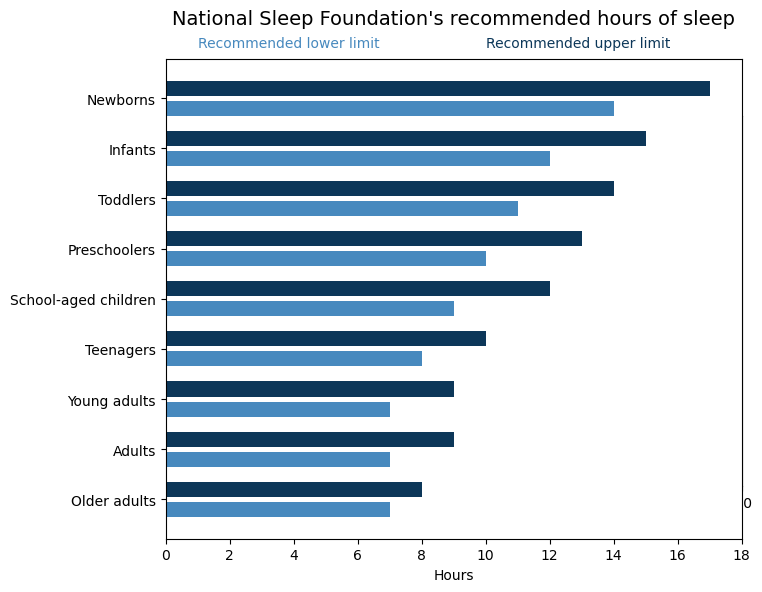

In [4]:
# Create plot objects
fig, ax = plt.subplots()
ax = fig.add_axes([0,0,0.9,1])

# Get data
w = 0.3
x = df_sleep['Age group'].sort_index(ascending=False)
rLower = df_sleep['Recommended lower'].sort_values()
rUpper = df_sleep['Recommended upper'].sort_values()

bar1 = np.arange(len(x))
bar2 = [i+0.4 for i in bar1] # adjust start point of second set of bars

ax.barh(bar1, rLower, w, label='Recommended Lower', color='#4789be')
ax.barh(bar2, rUpper, w, label='Recommended Upper', color='#0c3759')

# Customize plot
ax.set_xlabel('Hours')
ax.set_xlabel('Hours')
ax.set_yticks(ticks=bar1+0.2, labels=x)
ax.set_title("National Sleep Foundation's recommended hours of sleep", fontsize=14, pad=25)
ax.set_xlim(0, 18)
ax.text(1, 9.3, 'Recommended lower limit', verticalalignment='center', color='#4789be')
ax.text(10, 9.3, 'Recommended upper limit', verticalalignment='center', color='#0c3759')
fig.show

References:
- https://www.youtube.com/watch?v=ZjQCPMO7LBE
- https://stackoverflow.com/questions/16419670/increase-distance-between-title-and-plot-in-matplolib

## Question 2
___

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

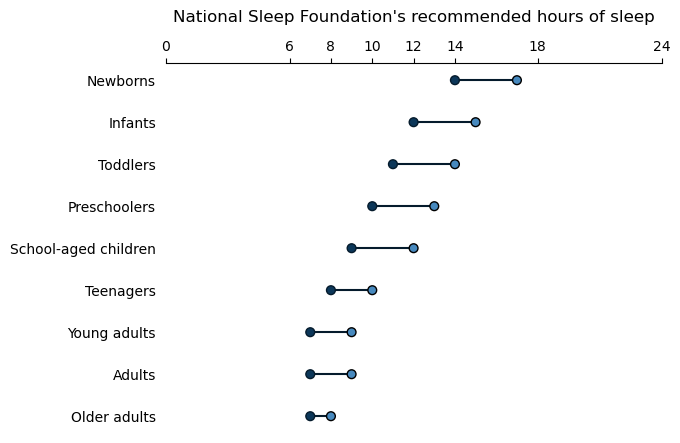

In [5]:
categories = df_sleep['Age group'].sort_index(ascending=False)

lVal = df_sleep['Recommended lower'].sort_values()
uVal = df_sleep['Recommended upper'].sort_values()

values = pd.concat([lVal, uVal], axis=1).sort_index(ascending=False)

# Plotting
fig, ax = plt.subplots()

for i, category in enumerate(categories):
    y_values = [i,i]
    ax.scatter(values.iloc[i], y_values, marker='o', c=['#0c3759','#4789be'], edgecolors=['#051b2c','black'], s=40, zorder=10)
    ax.plot(values.iloc[i], y_values, color='#051b2c')

# Customize and Show the plot
ax.set_yticks(np.arange(len(categories)))
ax.set_yticklabels(categories)
ax.yaxis.set_ticks_position('none') 

ax.set_xlim(0,24)
ax.set_xticks([0,6,8,10,12,14,18,24])
ax.xaxis.set_ticks_position('top')

ax.spines[['left','bottom','right']].set_visible(False)
ax.set_title("National Sleep Foundation's recommended hours of sleep", pad=30)
fig.show

References:
- https://stackoverflow.com/questions/14406214/moving-x-axis-to-the-top-of-a-plot-in-matplotlib
- https://python-graph-gallery.com/132-basic-connected-scatterplot/
- https://stackoverflow.com/questions/12998430/how-to-remove-xticks-from-a-plot

## Question 3
___

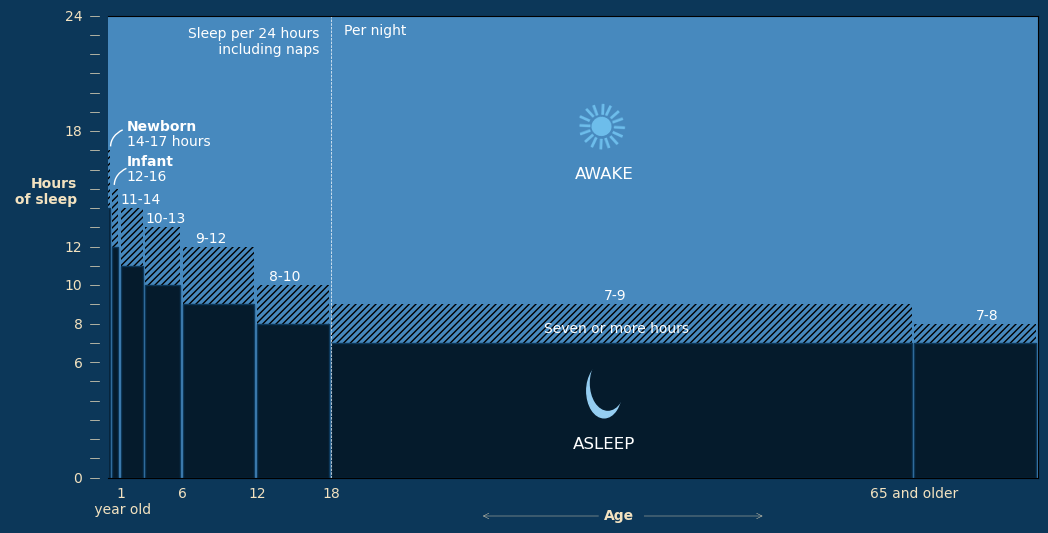

In [6]:
from matplotlib.patches import Arc
import matplotlib.patches as patches

df_MinAge = df_sleep['Min age']
df_MaxAge = df_sleep['Max age'].fillna(75)
age_diff = df_MaxAge - df_sleep['Min age']
df_rLower = df_sleep['Recommended lower']
df_rUpper = df_sleep['Recommended upper']

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

w = 0
# Plotting the diagonal hatching
for i, (age, upper) in enumerate(zip(df_MinAge, df_rUpper)):
    if int(age) == 18:
        w = age_diff.iloc[i] + age_diff.iloc[i+1] - 0.2
    else:
        w = age_diff.iloc[i] - 0.2       
    if int(age) != 25:    
        ax.bar(age, upper, color='none', hatch='/////', width=w, align='edge')
        
# Plotting the bars
for i, (age, lower) in enumerate(zip(df_MinAge, df_rLower)):
    if int(age) == 18:
        w = age_diff.iloc[i] + age_diff.iloc[i+1] - 0.2
    else:
        w = age_diff.iloc[i] - 0.2     
    if int(age) != 25:  
        ax.bar(age, lower, color='#051b2c', edgecolor='#0c3759', width=w, align='edge')


# Customize the plot

# Add background color outside the main frame
ax.set_facecolor('#4789be')  

# Set background color of the outer #area of the plot
fig.set_facecolor('#0c3759')

# Vertical dashed line at 18 years of age
ax.axvline(x=18, color='white', linestyle='--', linewidth=0.5)

# Customize the x-axis
ax.set_xlim(0,75)
ax.set_xticks(df_MinAge.astype(int))
ax.set_xticklabels(['','','1\n year old','','6','12','18','','65 and older'], color='#f3e2c0')
ax.xaxis.set_ticks_position('none') 

# Adjust the y-axis ticks as needed and other customizations
ax.set_yticks(np.arange(0, 25))  
ax.set_yticklabels(['0','','','','','','6','','8','','10','','12','','','','','','18','','','','','','24'],color='#f3e2c0')
#ax.set_ylabel('Hours\n of Sleep', color='#f3e2c0', rotation='horizontal', wrap=True, labelpad=25, weight='bold')
ax.tick_params(axis='y', which='major', pad=15, direction='out', left='off')
ax.yaxis.set_ticks_position('none')

# create ticks away from the y-axis
for y_tick in range(25): 
  ax.axhline(y=y_tick, xmin=-0.02, xmax=-0.01, linewidth=0.5, color='#f3e2c0', linestyle='-', clip_on=False)

# Remove left spine
ax.spines[['left']].set_visible(False)

# Add arrows on either side of the "Age" label
arrow_props = dict(color='#f3e2c0', arrowstyle='->', linewidth=0.3)
ax.annotate('Age', color='#f3e2c0', xy=(30, -2), xytext=(40, -2), arrowprops=arrow_props, fontsize=10, weight='bold', va='center', annotation_clip=False)
arrow_props = dict(color='#f3e2c0', arrowstyle='<-', linewidth=0.3)
ax.annotate('', xy=(43, -2), xytext=(53, -2), arrowprops=arrow_props, va='center', annotation_clip=False)


# using Unicode character for 'SUN WITH RAYS' to create sun icon 
sun_code = u'\u2600'  
# Place the sun symbol on the plot
ax.text(40.00, 18.50, sun_code, color='#6ebeec', fontsize=45, ha='center', va='center', rotation=87)
ax.text(39.80, 18.65, sun_code, color='#6ebeec', fontsize=45, ha='center', va='center', rotation=110)

#creating moon
moon_circle = plt.Circle((40, 4.5), 1.4, color='#95cef2', fill=True, capstyle='round')
ax.add_patch(moon_circle)
moon_circle = plt.Circle((40.3, 4.9), 1.4, color='#051b2c', fill=True, capstyle='round')
ax.add_patch(moon_circle)


#arcs for first two bars
arc = patches.Arc((2.2, 17.2), 2, 4, theta1=50, theta2=90, edgecolor='white', angle=90)
ax.add_patch(arc)
arc = patches.Arc((2.5, 15.2), 2, 4, theta1=50, theta2=90, edgecolor='white', angle=90)
ax.add_patch(arc)

# Customized texts for bars
ax.text(17, 22, 'Sleep per 24 hours\n including naps', color='white', ha='right')
ax.text(19, 23, 'Per night', ha='left', color='white')
ax.text(1.5, 18, 'Newborn', color='white', ha='left', weight='bold')
ax.text(1.5, 17.2, '14-17 hours', ha='left', color='white')
ax.text(1.5, 16.2, 'Infant', color='white', ha='left', weight='bold')
ax.text(1.5, 15.4, '12-16', ha='left', color='white')
ax.text(1, 14.2, '11-14', ha='left', color='white')
ax.text(3, 13.2, '10-13', ha='left', color='white')
ax.text(7, 12.2, '9-12', ha='left', color='white')
ax.text(13, 10.2, '8-10', ha='left', color='white')
ax.text(40, 9.2, '7-9', ha='left', color='white')
ax.text(41, 7.5, 'Seven or more hours', ha='center', color='white')
ax.text(40, 1.5, 'ASLEEP', ha='center', color='white', fontsize=12)
ax.text(40, 15.5, 'AWAKE', ha='center', color='white', fontsize=12)
ax.text(70, 8.2, '7-8', ha='left', color='white')
ax.text(-2.5, 14.2, 'Hours\n of sleep', ha='right', color='#f3e2c0', weight='bold')

# Show the plot
plt.show()

References:

- https://www.geeksforgeeks.org/how-to-set-plot-background-color-in-matplotlib/
- https://stackoverflow.com/questions/62052017/matplotlib-changing-position-of-bars
- https://stackoverflow.com/questions/19026684/convert-float-series-into-an-integer-series-in-pandas
- https://stackoverflow.com/questions/36162414/how-to-add-bold-annotated-text-to-a-plot
- https://python-graph-gallery.com/190-custom-matplotlib-title/#:~:text=You%20can%20easily%20add%20a,new%20line%20in%20the%20text.
- https://matplotlib.org/stable/users/explain/text/annotations.html#
- https://stackoverflow.com/questions/35972380/annotate-axis-with-text-in-matplotlib